In [0]:
# Importing some packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.datasets import california_housing
from scipy import stats
import seaborn as sns
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import svm

# **california_housing Dataset**

---


**The following function returns:**
dataset : dict-like object with the following attributes:

**dataset.data :** ndarray, shape [20640, 8]

    Each row corresponding to the 8 feature values in order.
**dataset.target :** numpy array of shape (20640,)

    Each value corresponds to the average house value in units of 100,000.
**dataset.feature_names :** array of length 8

    Array of ordered feature names used in the dataset.
**dataset.DESCR :** string

    Description of the California housing dataset.


---



In [33]:
housing_data = california_housing.fetch_california_housing()
housing_data

{'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block\n        - HouseAge      median house age in block\n        - AveRooms      average number of rooms\n        - AveBedrms     average number of bedrooms\n        - Population    block population\n        - AveOccup      average house occupancy\n        - Latitude      house block latitude\n        - Longitude     house block longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttp://lib.stat.cmu.edu/datasets/\n\nThe target variable is the median house value for California districts.\n\nThis dataset was derived from the 1990 U.S. census, using one row per census\nblock group. A block group is the smallest geograp

Separating `Feature` and `Target (Label)`

In [34]:
Features = pd.DataFrame(housing_data.data, columns=housing_data.feature_names)
Target = pd.DataFrame(housing_data.target, columns=['Target'])
df = Features.join(Target)
df.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [35]:
## check null
df['MedInc'].isna().sum()

0

In [36]:
# to check for Nan values (Another way)
df['MedInc'].isnull().values.any()

False

In [37]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


---

Let us consider only one feature say **MedInc**

---


In [39]:
df[['MedInc', 'Target']].describe()

,MedInc,Target
count,20640.000000,20640.000000
mean,3.870671,2.068558
std,1.899822,1.153956
min,0.499900,0.149990
25%,2.563400,1.196000
50%,3.534800,1.797000
75%,4.743250,2.647250
max,15.000100,5.000010


---

Let us use the function **df.corr()** to compute pairwise correlation of columns, excluding NA/null values.

---

In [40]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Target,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


**Pre-Processing**

Notice that 75% of the data has price less than 2.65, but maximum price go as high as 5. Thus we should remove the extremely expensive houses which might prone noise.

In [41]:
## size is reduced from 20640 to 19648
df[df.Target < 5].Target

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: Target, Length: 19648, dtype: float64

In [0]:
df = df[df.Target < 5]

---
#### Normalization of the `MedInc` and `Target` by using `Min-Max Normalization method`
---

In [52]:
# Scale them between 0 to 1
def Norm(x):
  minx = np.min(x)
  maxx = np.max(x)
  return pd.Series([(i-minx)/(maxx-minx) for i in x])

x = Norm(df.MedInc)
y = Norm(df.Target)
print("Normalization form of MedInc : \n{}".format(x))
print("Normalization form of Target : \n{}".format(y))

Normalization form of MedInc : 
0        0.539668
1        0.538027
2        0.466028
3        0.354699
4        0.230776
           ...   
19643    0.073130
19644    0.141853
19645    0.082764
19646    0.094295
19647    0.130253
Length: 19648, dtype: float64
Normalization form of Target : 
0        0.903946
1        0.709565
2        0.696344
3        0.674035
4        0.675894
           ...   
19643    0.130347
19644    0.128281
19645    0.159679
19646    0.143980
19647    0.153689
Length: 19648, dtype: float64


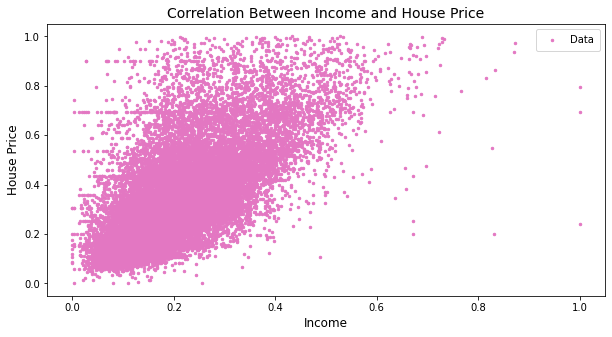

In [53]:
plt.figure(figsize=(10,5))
plt.scatter(x, y, label='Data', c='#e377c2', s=6)
plt.title('Correlation Between Income and House Price', fontSize=14)
plt.xlabel('Income', fontSize=12)
plt.ylabel('House Price', fontSize=12)
plt.legend(loc=1, fontsize=10, borderpad=.6)
plt.show()

#**Linear Regression With scikit-learn**



---


There are five basic steps when you’re implementing linear regression:

1. Import the packages and classes you need.
2. Provide data to work with and eventually do appropriate transformations.
3. Create a regression model and fit it with existing data.
4. Check the results of model fitting to know whether the model is satisfactory.
5. Apply the model for predictions.


---


In [58]:
# Note X need to have one column and as many rows as necessary

X= np.array(x).reshape((-1, 1))
y=np.array(y)

print(x.ndim)
print(x.shape)
print(X.ndim)
print(X.shape)


1
(19648,)
2
(19648, 1)


---


This statement creates the variable model as the instance of LinearRegression. You can provide several optional parameters to LinearRegression:

1. fit_intercept is a Boolean (True by default) that decides whether to calculate the intercept 𝑏 (True) or consider it equal to zero (False).
2. normalize is a Boolean (False by default) that decides whether to normalize the input variables (True) or not (False).
3. n_jobs is an integer or None (default) and represents the number of jobs used in parallel computation. None usually means one job and -1 to use all processors.


---

In [0]:
#create a linear regression model and fit it using the existing data
model = LinearRegression(normalize=False)

In [60]:
#fit(), you calculate the optimal values of the weights m and 𝑏, using the existing input and output (X and y) as the argument
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: 0.10336187126396168
slope: [1.19772056]


In [64]:
y_pred = model.predict(X)
print(y_pred)
print(y_pred.ndim)

[0.74973383 0.74776795 0.66153326 ... 0.20249047 0.21630123 0.25936902]
1


In [70]:
y_pred = model.intercept_ + model.coef_ * X
print("Equation : {} + {}*X".format(model.intercept_,float(model.coef_)))
print('predicted response:', y_pred, sep='\n')
print(type(y_pred))
print(y_pred.ndim)

Equation : 0.10336187126396168 + 1.1977205624291174*X
predicted response:
[[0.74973383]
 [0.74776795]
 [0.66153326]
 ...
 [0.20249047]
 [0.21630123]
 [0.25936902]]
<class 'numpy.ndarray'>
2


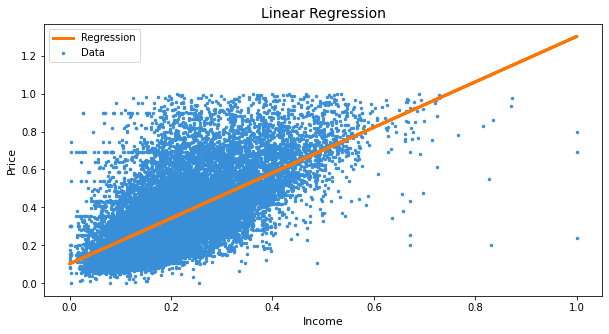

In [75]:
plt.figure(figsize=(10,5))
plt.scatter(X, y, label='Data', c='#388fd8', s=6)
plt.plot(X, y_pred, c='#ff7702', lw=3, label='Regression')
plt.title('Linear Regression', fontSize=14)
plt.xlabel('Income', fontSize=11)
plt.ylabel('Price', fontSize=11)
plt.legend(frameon=True, loc=0, fontsize=10)
plt.show()